# ex02-Visualize Elevation Contours from DEM data

A digital elevation model ([DEM](https://en.wikipedia.org/wiki/Digital_elevation_model)) is a 3D CG representation of a terrain's surface – commonly of a planet (e.g. Earth), moon, or asteroid – created from a terrain's elevation data. A "global DEM" refers to a discrete global grid.

DEMs are used often in geographic information systems, and are the most common basis for digitally produced relief maps. While a digital surface model (DSM) may be useful for landscape modeling, city modeling and visualization applications, a digital terrain model (DTM) is often required for flood or drainage modeling, land-use studies, geological applications, and other applications, and in planetary science.

There is no universal usage of the terms digital elevation model (DEM), digital terrain model (DTM) and digital surface model (DSM) in scientific literature. In most cases the term digital surface model represents the earth's surface and includes all objects on it. In contrast to a DSM, the digital terrain model (DTM) represents the bare ground surface without any objects like plants and buildings. DEM is often used as a generic term for DSMs and DTMs,only representing height information without any further definition about the surface. See more from https://en.wikipedia.org/wiki/Digital_elevation_model.

A DEM stores data in the format of a 2D array where each cell has a corresponding elevation value. Therefore, it may sometimes prove useful to visualize these elevation models with mechanisms such as contour lines. Fortunately, there are quite a few tools written in Python available to deal with DEMs, such as GDAL, Rasterio, numpy, xarray, etc. 

As [xarray](http://xarray.pydata.org/en/stable/) is always my favorite tool, this notebook will still apply it. However, it is worth noting that xarray uses the [rasterio](https://rasterio.readthedocs.io/en/stable/)library as the backend engine to read DEM data. :) using xarray+rasterio will save quite a few lines of source code.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import cmaps as nclcmaps
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 12" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

## Read dem data

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [33]:
infile = "data/n30w100_con"
da_dem = xr.open_rasterio(infile).drop('band')[0].rename({'x':'longitude', 'y':'latitude'})
da_dem = da_dem.where(da_dem>=0, np.nan)

***Calucate mimimum and maximum values***

Should be 0 and 745.

In [34]:
print(da_dem.min(), da_dem.max())

<xarray.DataArray ()>
array(0.) <xarray.DataArray ()>
array(745.)


## Visualize

xarray provides plotting functionality. However, it is a thin wrapper around the popular matplotlib library. Matplotlib syntax and function names were copied as much as possible, which makes for an easy transition between the two. Matplotlib must be installed before xarray can plot.

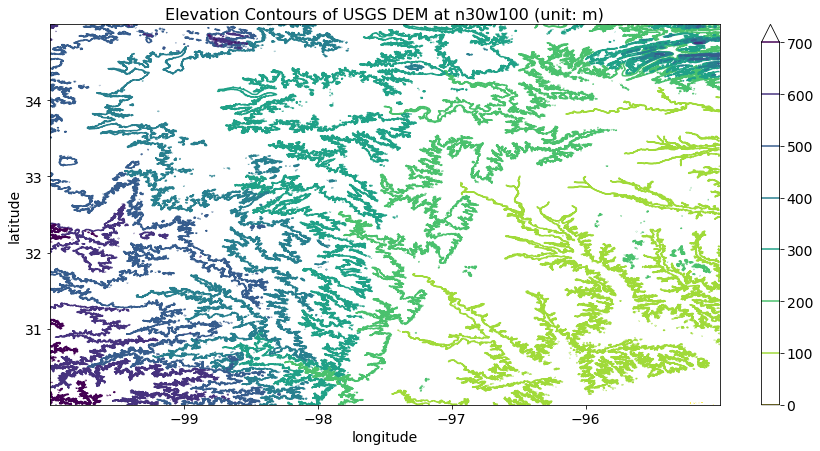

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
da_dem.plot.contour(ax=ax,
                    levels = np.arange(0, 750, 100),
                    cmap=nclcmaps.MPL_viridis_r,
                    add_colorbar=True
                   )

_ = ax.set_title('Elevation Contours of USGS DEM at n30w100 (unit: m)', fontsize=16)

From these coutours, we can clearly identify the ***river networks*** in the lower areas. In addition, it is quite easy to visualize the DEM with a full color map. Just need change a little bit of the above code as follows.

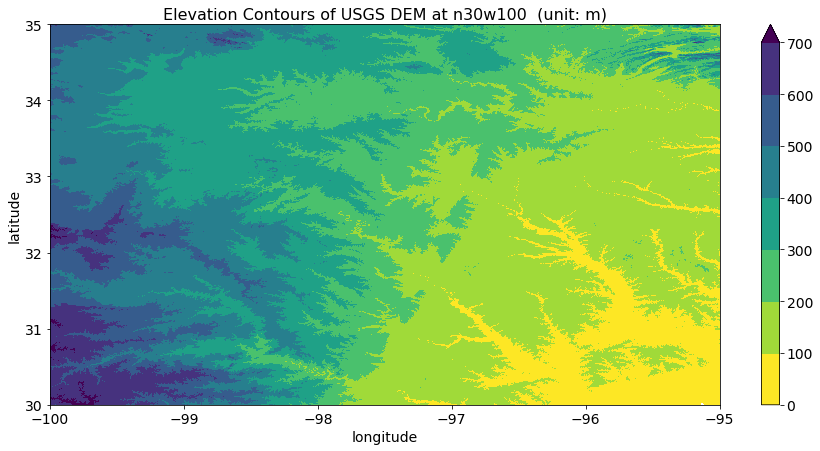

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))
da_dem.plot(ax=ax,
            levels = np.arange(0, 750, 100),
            cmap=nclcmaps.MPL_viridis_r,
            add_colorbar=True
           )

_ = ax.set_title('Elevation Contours of USGS DEM at n30w100  (unit: m)', fontsize=16)

## References

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

https://rasterio.readthedocs.io/en/stable/

http://xarray.pydata.org/en/stable/

https://en.wikipedia.org/wiki/Digital_elevation_model